In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
file_path = '/content/drive/MyDrive/Capstone Project/Data-Capital'

file_list = os.listdir(file_path)
file_list

['202201-capitalbikeshare-tripdata.csv',
 '202202-capitalbikeshare-tripdata.csv',
 '202203-capitalbikeshare-tripdata.csv',
 '202204-capitalbikeshare-tripdata.csv',
 '202205-capitalbikeshare-tripdata.csv',
 '202206-capitalbikeshare-tripdata.csv',
 '202207-capitalbikeshare-tripdata.csv',
 '202208-capitalbikeshare-tripdata.csv',
 '202209-capitalbikeshare-tripdata.csv',
 '202210-capitalbikeshare-tripdata.csv',
 '202211-capitalbikeshare-tripdata.csv',
 '202212-capitalbikeshare-tripdata.csv']

In [5]:
capital_df= pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv(os.path.join(file_path,file))
            df_temp.drop(['ride_id','start_station_id','end_station_id'],axis=1,inplace=True)
            # df_temp = df_temp[df_temp['rideable_type']=='electric_bike']
            capital_df = capital_df.append(df_temp, ignore_index=True)

In [6]:
capital_df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,Potomac Ave & Main Line Blvd,38.820932,-77.053096,38.822738,-77.049265,member
1,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,10th & G St NW,38.903658,-77.031737,38.898243,-77.026235,member
2,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,12th & L St NW,38.903658,-77.031737,38.903819,-77.028400,member
3,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,Nannie Helen Burroughs & Minnesota Ave NE,38.915604,-76.983683,38.901385,-76.941877,casual
4,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,Pennsylvania Ave & Park Ave,38.885434,-77.173605,38.887403,-77.176992,member
...,...,...,...,...,...,...,...,...,...,...
3476777,classic_bike,2022-12-29 11:50:13,2022-12-29 12:00:30,5th & K St NW,New Jersey Ave & F St NW,38.903040,-77.019027,38.897108,-77.011616,member
3476778,classic_bike,2022-12-05 19:14:05,2022-12-05 19:22:10,5th & K St NW,New Jersey Ave & F St NW,38.903040,-77.019027,38.897108,-77.011616,casual
3476779,electric_bike,2022-12-05 12:51:38,2022-12-05 12:56:16,5th & K St NW,New Jersey Ave & F St NW,38.903068,-77.018793,38.897108,-77.011616,casual
3476780,classic_bike,2022-12-09 17:07:36,2022-12-09 17:14:54,5th & K St NW,New Jersey Ave & F St NW,38.903040,-77.019027,38.897108,-77.011616,member


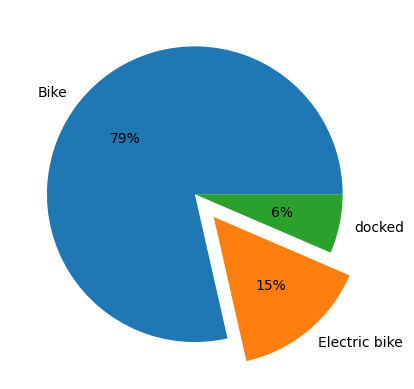

In [7]:
plt.pie(capital_df['rideable_type'].value_counts(), autopct = '%.0f%%', labels= ['Bike', 'Electric bike', 'docked'], explode = [0,0.2,0])
plt.show()

In [8]:
capital_df['rideable_type'].value_counts()

classic_bike     2731020
electric_bike     520965
docked_bike       224797
Name: rideable_type, dtype: int64

In [9]:
capital_df = capital_df[capital_df['rideable_type']=='electric_bike']

In [10]:
capital_df.isna().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    139820
end_station_name      152756
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [11]:
capital_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
8,electric_bike,2022-01-08 11:48:59,2022-01-08 11:56:21,14th & Harvard St NW,Calvert St & Woodley Pl NW,38.926775,-77.032137,38.923583,-77.050046,casual
12,electric_bike,2022-01-04 10:38:57,2022-01-04 10:58:20,Adams Mill & Columbia Rd NW,NaN,38.923056,-77.042543,38.900000,-77.030000,member
14,electric_bike,2022-01-30 15:07:18,2022-01-30 15:13:07,13th & E St SE,Eastern Market / 7th & North Carolina Ave SE,38.882921,-76.987862,38.886952,-76.996806,member
16,electric_bike,2022-01-18 14:28:53,2022-01-18 14:33:31,Connecticut & Nebraska Ave NW,Tenleytown / Wisconsin Ave & Albemarle St NW,38.955075,-77.070026,38.947607,-77.079382,member
28,electric_bike,2022-01-21 14:38:12,2022-01-21 14:51:30,13th & U St NW,5th & F St NW,38.916804,-77.029828,38.897222,-77.019347,member


In [12]:
capital_df['start_station_name'].fillna('Not_docked',inplace=True)
capital_df['end_station_name'].fillna('Not_docked',inplace=True)


In [13]:
from sklearn.cluster import KMeans

In [14]:
cluster_formation = capital_df[['start_station_name','start_lat','start_lng']]

In [15]:
cluster_formation

,start_station_name,start_lat,start_lng
8,14th & Harvard St NW,38.926775,-77.032137
12,Adams Mill & Columbia Rd NW,38.923056,-77.042543
14,13th & E St SE,38.882921,-76.987862
16,Connecticut & Nebraska Ave NW,38.955075,-77.070026
28,13th & U St NW,38.916804,-77.029828
...,...,...,...
3476684,Wisconsin Ave & Ingomar St NW,38.958238,-77.084617
3476698,Ballston Metro / Stuart St & 9th St N,38.881045,-77.111758
3476712,Ballston Metro / Stuart St & 9th St N,38.881058,-77.111858
3476739,Oklahoma Ave & D St NE,38.894445,-76.974944


In [16]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = cluster_formation[['start_lat']]
X_axis = cluster_formation[['start_lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize


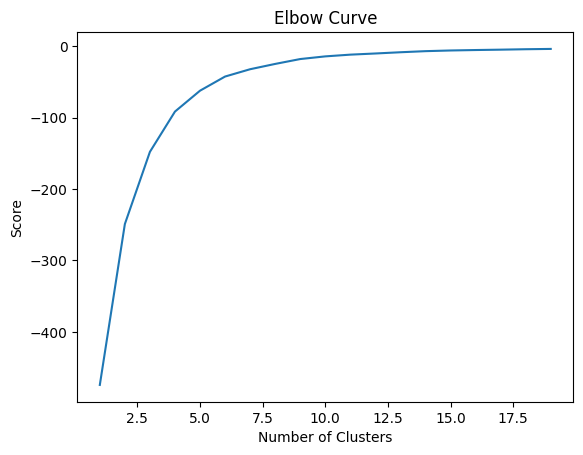

In [17]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 8, init ='k-means++')
kmeans.fit(cluster_formation[cluster_formation.columns[1:3]]) # Compute k-means clustering.
cluster_formation['cluster_label'] = kmeans.fit_predict(cluster_formation[cluster_formation.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster_formation[cluster_formation.columns[1:3]]) # Labels of each point
cluster_formation.head(10)

,start_station_name,start_lat,start_lng,cluster_label
8,14th & Harvard St NW,38.926775,-77.032137,7
12,Adams Mill & Columbia Rd NW,38.923056,-77.042543,7
14,13th & E St SE,38.882921,-76.987862,1
16,Connecticut & Nebraska Ave NW,38.955075,-77.070026,3
28,13th & U St NW,38.916804,-77.029828,7
37,1st & K St NE,38.902425,-77.005715,1
38,1st & K St NE,38.902848,-77.005689,1
45,14th & L St NW,38.903695,-77.031401,2
51,14th & L St NW,38.903755,-77.031935,2
58,Wakefield High School,38.847151,-77.112522,4


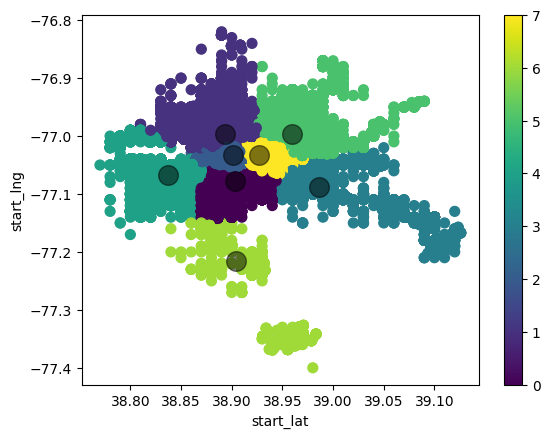

In [19]:
cluster_formation.plot.scatter(x = 'start_lat', y = 'start_lng', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [20]:
import folium

In [21]:
cf = cluster_formation.drop_duplicates('start_station_name')

In [22]:
map = folium.Map(location=[cf['start_lat'][8], cf['start_lng'][8]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
colors = ['red', 'blue', 'green','yellow','black','lightblue','orange','gray','lightgray']
for index, row in cf.iterrows():
    color = colors[row['cluster_label']]
    folium.Marker([row['start_lat'], row['start_lng']], icon=folium.Icon(color=color)).add_to(map)

# Display the map
map

In [23]:
capital_df = capital_df.merge(cluster_formation['cluster_label'], left_index=True, right_index=True)

In [24]:
capital_df

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,cluster_label
8,electric_bike,2022-01-08 11:48:59,2022-01-08 11:56:21,14th & Harvard St NW,Calvert St & Woodley Pl NW,38.926775,-77.032137,38.923583,-77.050046,casual,7
12,electric_bike,2022-01-04 10:38:57,2022-01-04 10:58:20,Adams Mill & Columbia Rd NW,Not_docked,38.923056,-77.042543,38.900000,-77.030000,member,7
14,electric_bike,2022-01-30 15:07:18,2022-01-30 15:13:07,13th & E St SE,Eastern Market / 7th & North Carolina Ave SE,38.882921,-76.987862,38.886952,-76.996806,member,1
16,electric_bike,2022-01-18 14:28:53,2022-01-18 14:33:31,Connecticut & Nebraska Ave NW,Tenleytown / Wisconsin Ave & Albemarle St NW,38.955075,-77.070026,38.947607,-77.079382,member,3
28,electric_bike,2022-01-21 14:38:12,2022-01-21 14:51:30,13th & U St NW,5th & F St NW,38.916804,-77.029828,38.897222,-77.019347,member,7
...,...,...,...,...,...,...,...,...,...,...,...
3476684,electric_bike,2022-12-31 14:36:44,2022-12-31 14:52:19,Wisconsin Ave & Ingomar St NW,Bethesda Ave & Arlington Rd,38.958238,-77.084617,38.981103,-77.097426,casual,3
3476698,electric_bike,2022-12-08 03:27:51,2022-12-08 03:34:50,Ballston Metro / Stuart St & 9th St N,Wilson Blvd & N Edgewood St,38.881045,-77.111758,38.889396,-77.091862,member,0
3476712,electric_bike,2022-12-14 17:18:00,2022-12-14 17:32:46,Ballston Metro / Stuart St & 9th St N,Clarendon Blvd & Pierce St,38.881058,-77.111858,38.893438,-77.076389,member,0
3476739,electric_bike,2022-12-01 16:13:45,2022-12-01 16:27:21,Oklahoma Ave & D St NE,New Jersey Ave & F St NW,38.894445,-76.974944,38.897108,-77.011616,member,1


In [25]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from haversine import haversine, Unit


def distance(a):

  point1 = (a[0],a[1])
  point2 = (a[2],a[3])
  distance = haversine(point1, point2, unit=Unit.MILES)

  return distance


In [27]:
capital_df['Distance_travelled'] = capital_df[['start_lat','start_lng','end_lat','end_lng']].apply(distance,axis=1)

In [28]:
capital_df['started_at'] = capital_df['started_at'].astype('datetime64[ns]')
capital_df['ended_at'] = capital_df['ended_at'].astype('datetime64[ns]')

In [29]:
capital_df['start_date'] = capital_df['started_at'].dt.date
capital_df['end_date'] =  capital_df['ended_at'].dt.date
capital_df['start_time'] = capital_df['started_at'].dt.time
capital_df['end_time'] = capital_df['ended_at'].dt.time
capital_df['start_hour'] = capital_df['started_at'].dt.hour
capital_df['end_hour'] = capital_df['ended_at'].dt.hour
capital_df['start_minute'] = capital_df['started_at'].dt.minute


In [30]:
def quater(x):
  if x in list(range(0,15)):
    return 1
  elif x in list(range(15,30)):
    return 2
  elif x in list(range(30,45)):
    return 3
  else: return 4

In [31]:
capital_df['quater_hour'] = capital_df['start_minute'].apply(quater)

In [32]:
capital_df.reset_index(drop=True, inplace=True)

In [33]:
capital_df['start_station_name'].value_counts()

Not_docked                                139820
14th & Irving St NW                         3838
Lamont & Mt Pleasant NW                     3632
Adams Mill & Columbia Rd NW                 3474
1st & M St NE                               3259
                                           ...  
S George Mason Dr & S Four Mile Run Dr         1
South Dakota Ave & 33rd St NE                  1
South Dakota Ave & Bladensburg Rd NE           1
Briggs Chaney Park & Ride                      1
S Troy St & 26th St S                          1
Name: start_station_name, Length: 745, dtype: int64

In [34]:
from datetime import datetime, timedelta

In [35]:

# print((capital_df['ended_at'][8]-capital_df['started_at'][8]).seconds)
def minutes (x):
  minutes = int((x[0]-x[1])/ timedelta(minutes=1))
  return minutes

In [36]:
# capital_df['minutes_travelled'] = 
capital_df['minutes_travelled'] = capital_df[['ended_at','started_at']].apply(minutes,axis=1)

In [37]:
capital_df


,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,...,Distance_travelled,start_date,end_date,start_time,end_time,start_hour,end_hour,start_minute,quater_hour,minutes_travelled
0,electric_bike,2022-01-08 11:48:59,2022-01-08 11:56:21,14th & Harvard St NW,Calvert St & Woodley Pl NW,38.926775,-77.032137,38.923583,-77.050046,casual,...,0.987599,2022-01-08,2022-01-08,11:48:59,11:56:21,11,11,48,4,7
1,electric_bike,2022-01-04 10:38:57,2022-01-04 10:58:20,Adams Mill & Columbia Rd NW,Not_docked,38.923056,-77.042543,38.900000,-77.030000,member,...,1.729866,2022-01-04,2022-01-04,10:38:57,10:58:20,10,10,38,3,19
2,electric_bike,2022-01-30 15:07:18,2022-01-30 15:13:07,13th & E St SE,Eastern Market / 7th & North Carolina Ave SE,38.882921,-76.987862,38.886952,-76.996806,member,...,0.555850,2022-01-30,2022-01-30,15:07:18,15:13:07,15,15,7,1,5
3,electric_bike,2022-01-18 14:28:53,2022-01-18 14:33:31,Connecticut & Nebraska Ave NW,Tenleytown / Wisconsin Ave & Albemarle St NW,38.955075,-77.070026,38.947607,-77.079382,member,...,0.720403,2022-01-18,2022-01-18,14:28:53,14:33:31,14,14,28,2,4
4,electric_bike,2022-01-21 14:38:12,2022-01-21 14:51:30,13th & U St NW,5th & F St NW,38.916804,-77.029828,38.897222,-77.019347,member,...,1.465616,2022-01-21,2022-01-21,14:38:12,14:51:30,14,14,38,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520960,electric_bike,2022-12-31 14:36:44,2022-12-31 14:52:19,Wisconsin Ave & Ingomar St NW,Bethesda Ave & Arlington Rd,38.958238,-77.084617,38.981103,-77.097426,casual,...,1.723163,2022-12-31,2022-12-31,14:36:44,14:52:19,14,14,36,3,15
520961,electric_bike,2022-12-08 03:27:51,2022-12-08 03:34:50,Ballston Metro / Stuart St & 9th St N,Wilson Blvd & N Edgewood St,38.881045,-77.111758,38.889396,-77.091862,member,...,1.215695,2022-12-08,2022-12-08,03:27:51,03:34:50,3,3,27,2,6
520962,electric_bike,2022-12-14 17:18:00,2022-12-14 17:32:46,Ballston Metro / Stuart St & 9th St N,Clarendon Blvd & Pierce St,38.881058,-77.111858,38.893438,-77.076389,member,...,2.090587,2022-12-14,2022-12-14,17:18:00,17:32:46,17,17,18,2,14
520963,electric_bike,2022-12-01 16:13:45,2022-12-01 16:27:21,Oklahoma Ave & D St NE,New Jersey Ave & F St NW,38.894445,-76.974944,38.897108,-77.011616,member,...,1.980601,2022-12-01,2022-12-01,16:13:45,16:27:21,16,16,13,1,13


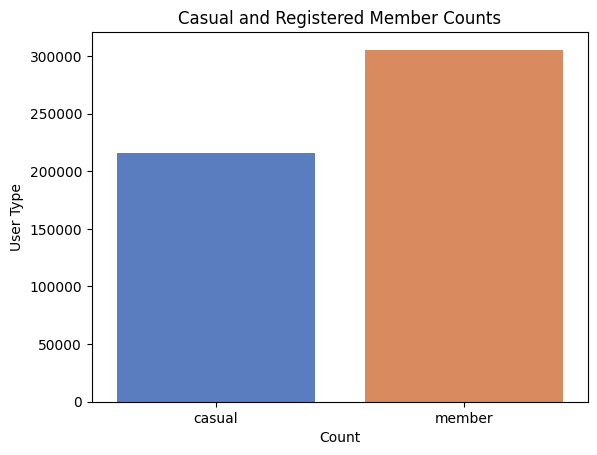

In [38]:
sns.countplot(data=capital_df, x='member_casual',palette="muted")

# Set the axis labels and title
plt.xlabel("Count")
plt.ylabel("User Type")
plt.title("Casual and Registered Member Counts")
plt.show()


In [39]:
top10_start_stations = capital_df['start_station_name'].value_counts()[1:20]
top10_end_stations = capital_df['end_station_name'].value_counts()[1:20]

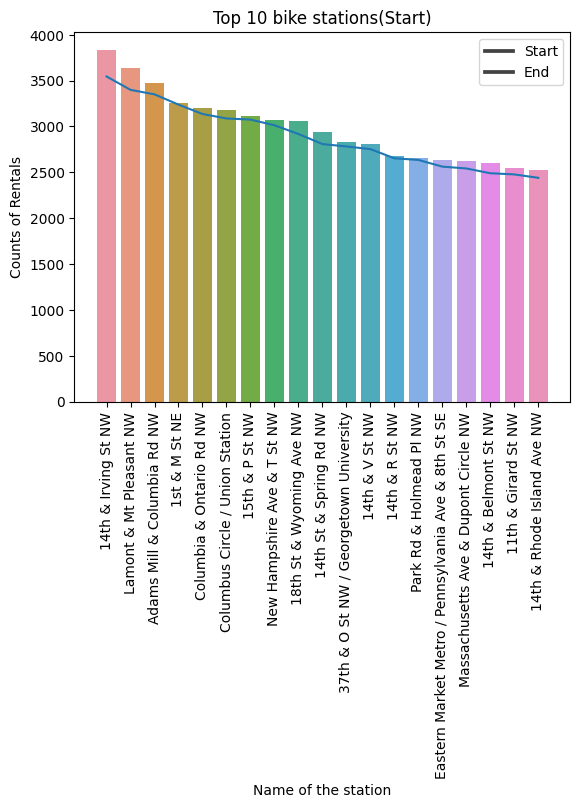

In [40]:
sns.barplot(x=top10_start_stations.index, y=top10_start_stations.values)
sns.lineplot(x=top10_end_stations.index, y=top10_end_stations.values)
plt.xticks(rotation = 90)
plt.xlabel('Name of the station')
plt.ylabel('Counts of Rentals')
plt.title('Top 10 bike stations(Start)')
plt.legend(['Start','End'])
plt.show()

In [41]:
# sns.barplot(x=top10_end_stations.index, y=top10_end_stations.values)
# plt.xticks(rotation = 90)
# plt.xlabel('Name of the station')
# plt.ylabel('Counts of Rentals')
# plt.title('Top 10 bike stations(End)')
# plt.show()

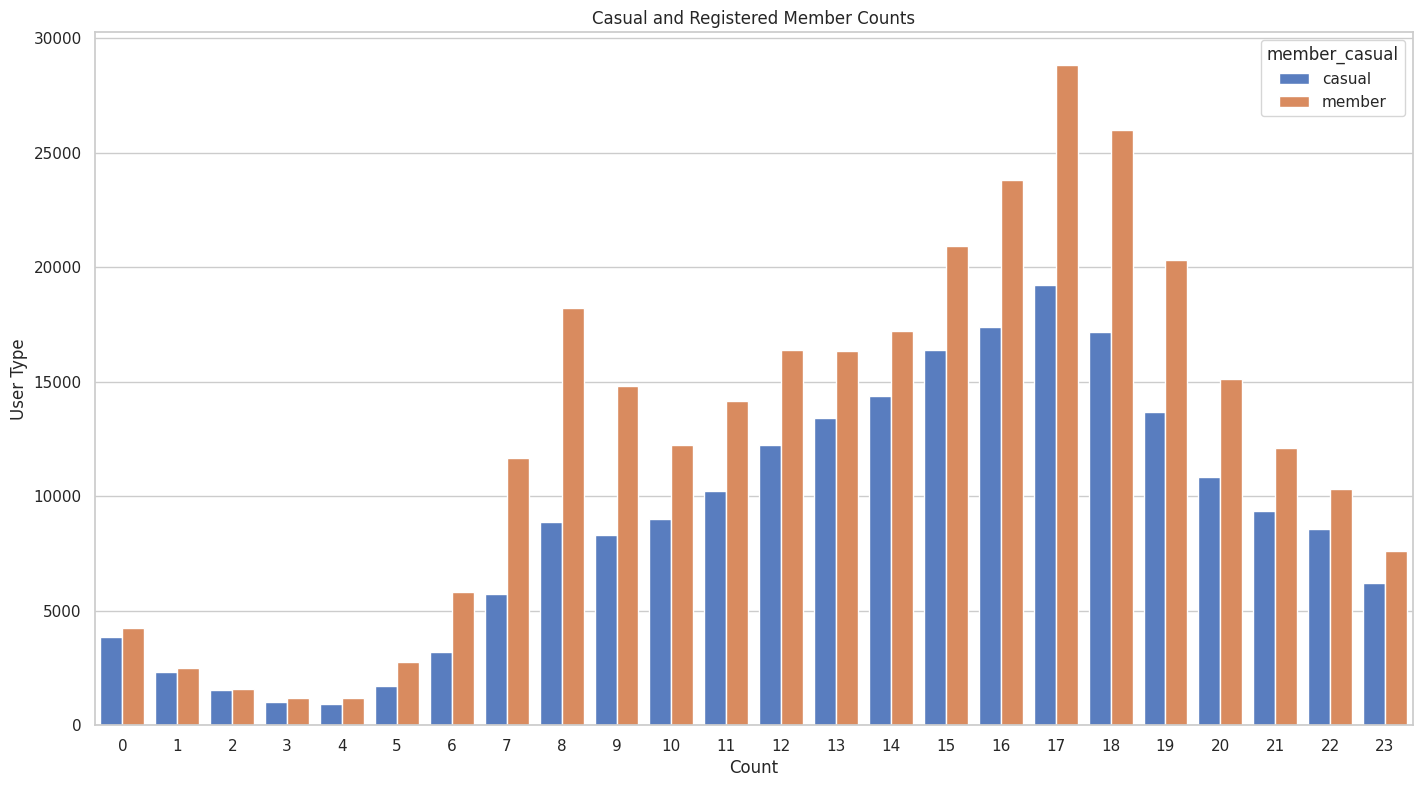

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,9))
sns.countplot(data=capital_df, hue='member_casual',x='start_hour',palette="muted")
# Set the axis labels and title
plt.xlabel("Count")
plt.ylabel("User Type")
plt.title("Casual and Registered Member Counts")
plt.show()


In [43]:
capital_df.Distance_travelled.value_counts()

0.000000    20600
0.690934     4757
0.690934     1357
0.537639      991
1.381868      979
            ...  
5.344638        1
1.209085        1
0.549466        1
6.263573        1
0.564360        1
Name: Distance_travelled, Length: 402024, dtype: int64

In [44]:
capital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520965 entries, 0 to 520964
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       520965 non-null  object        
 1   started_at          520965 non-null  datetime64[ns]
 2   ended_at            520965 non-null  datetime64[ns]
 3   start_station_name  520965 non-null  object        
 4   end_station_name    520965 non-null  object        
 5   start_lat           520965 non-null  float64       
 6   start_lng           520965 non-null  float64       
 7   end_lat             520965 non-null  float64       
 8   end_lng             520965 non-null  float64       
 9   member_casual       520965 non-null  object        
 10  cluster_label       520965 non-null  int32         
 11  Distance_travelled  520965 non-null  float64       
 12  start_date          520965 non-null  object        
 13  end_date            520965 no

<Axes: xlabel='Distance_travelled'>

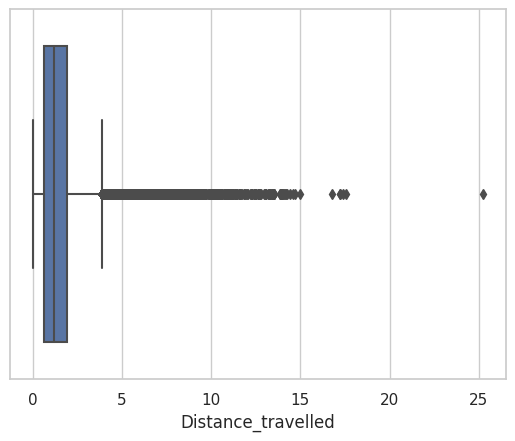

In [45]:
sns.boxplot(x=capital_df["Distance_travelled"])


<Axes: xlabel='Distance_travelled', ylabel='Count'>

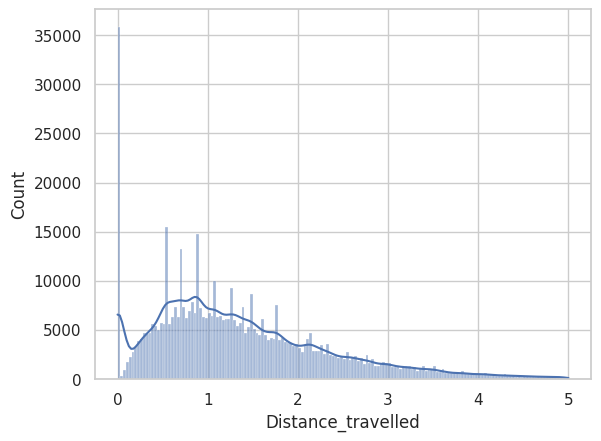

In [46]:
# Filter the data to exclude outliers
no_outliers = capital_df[capital_df["Distance_travelled"] < 5]
sns.histplot(no_outliers['Distance_travelled'],kde=True)

<Axes: ylabel='minutes_travelled'>

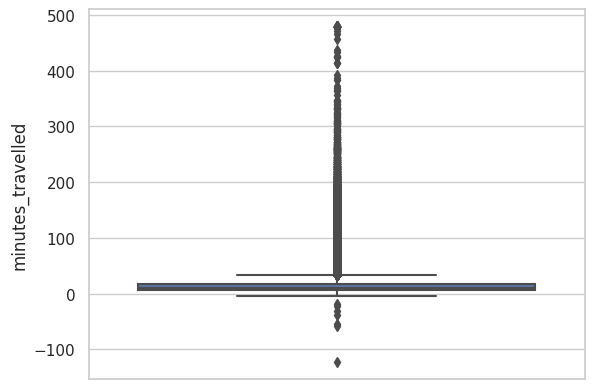

In [47]:
sns.boxplot(y=capital_df["minutes_travelled"])


<Axes: xlabel='minutes_travelled', ylabel='Count'>

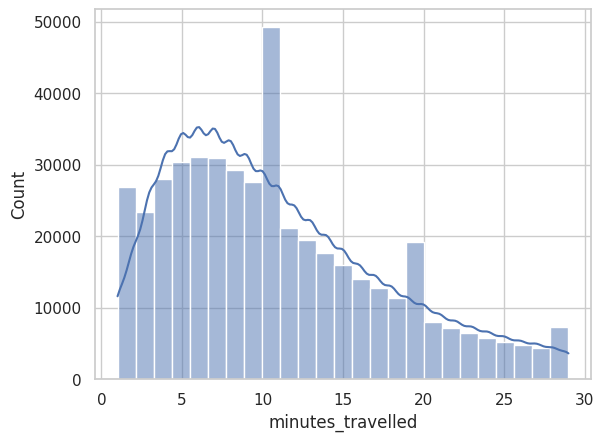

In [48]:
no_outliers = capital_df[(capital_df['minutes_travelled'] > 0)  & (capital_df['minutes_travelled'] < 30)]
sns.histplot(no_outliers['minutes_travelled'],kde=True, bins=25)

<Axes: >

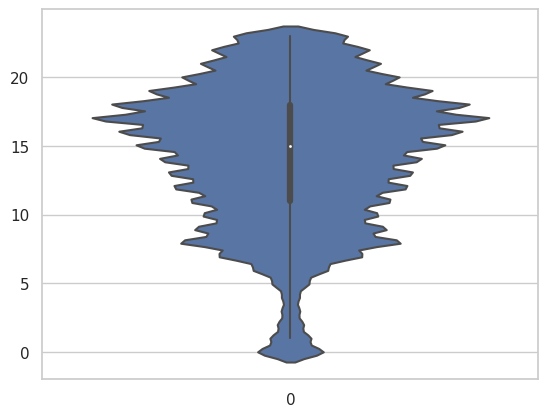

In [49]:
sns.violinplot(capital_df['start_hour'])

In [50]:
capital_df['start_month'] = capital_df['started_at'].dt.month

<Axes: xlabel='start_month', ylabel='count'>

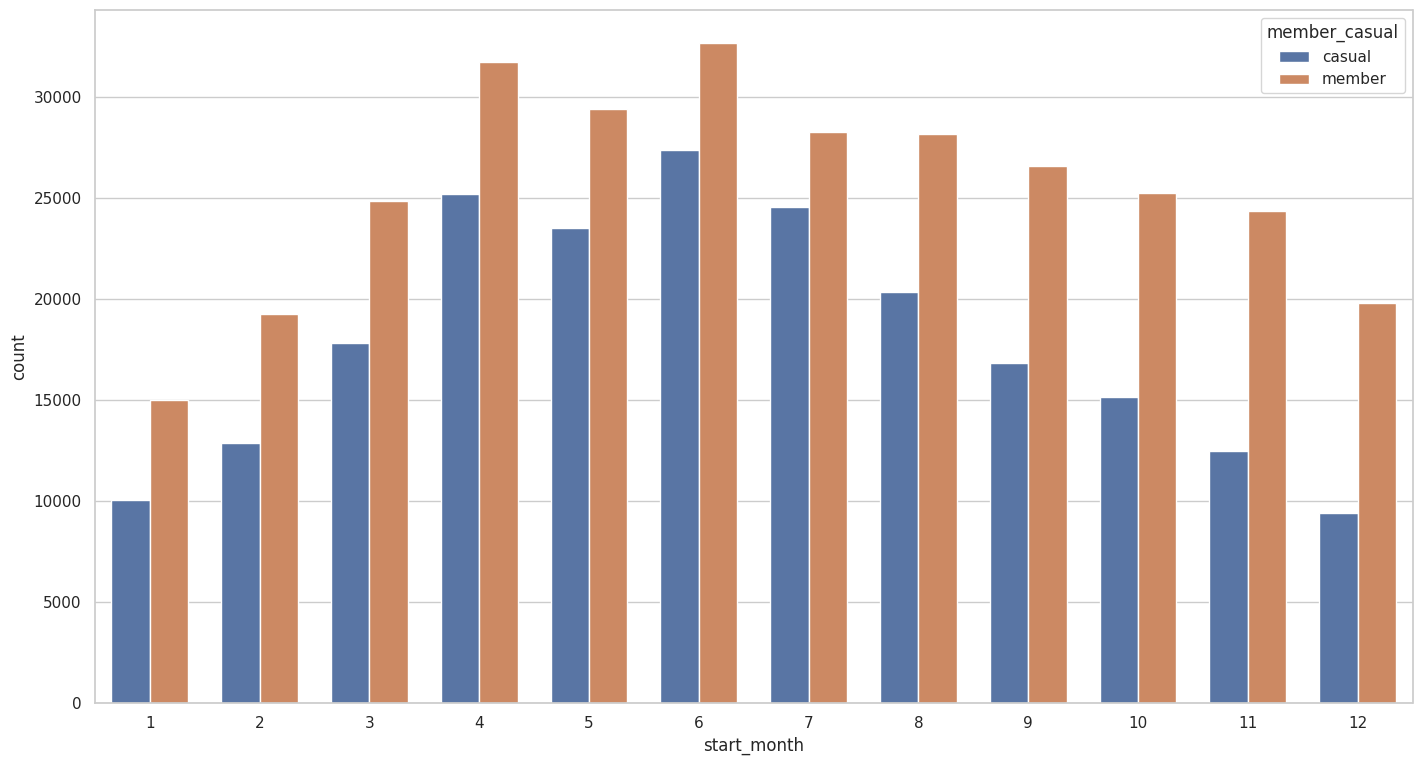

In [51]:
plt.figure(figsize=(17,9))
sns.countplot(capital_df, x='start_month', hue='member_casual',width = 0.7)

<Axes: >

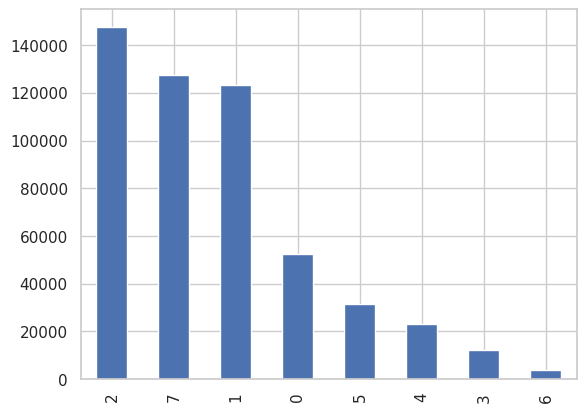

In [52]:
capital_df['cluster_label'].value_counts().plot(kind='bar')

In [53]:
start = capital_df[capital_df['cluster_label'] == 0][['start_station_name','start_lat','start_lng']].drop_duplicates('start_station_name')
end = capital_df[capital_df['cluster_label'] == 0][['end_station_name','end_lat','end_lng']].drop_duplicates('end_station_name')

In [54]:
start.shape, end.shape

((89, 3), (548, 3))

In [55]:
start

,start_station_name,start_lat,start_lng
13,Potomac & M St NW,38.905446,-77.065278
34,M St & Pennsylvania Ave NW,38.905108,-77.056914
40,Rosslyn Metro / Wilson Blvd & N Moore St,38.896033,-77.071472
53,37th & O St NW / Georgetown University,38.907941,-77.071622
59,Wisconsin Ave & O St NW,38.908471,-77.063693
...,...,...,...
477838,19th St N & Ft Myer Dr,38.897134,-77.072062
493180,Wilson Blvd & N Vermont St,38.879466,-77.114396
494900,N Pershing Dr & N Quebec St,38.874305,-77.104849
516131,N Pershing Dr & N George Mason Dr,38.871754,-77.107962


In [56]:
map = folium.Map(location=[start['start_lat'][31], start['start_lng'][31]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
for index, row in start.iterrows():
    folium.Marker([row['start_lat'], row['start_lng']], icon=folium.Icon()).add_to(map)

# Display the map
map

KeyError: ignored

In [ ]:
end

In [ ]:
map = folium.Map(location=[end['end_lat'][31], end['end_lng'][31]], zoom_start=4)

# Add markers for each latitude-longitude point, with marker color based on the cluster label
for index, row in end.iterrows():
    folium.Marker([row['end_lat'], row['end_lng']], icon=folium.Icon()).add_to(map)

# Display the map
map

In [57]:
capital_df['Day_of_week'] = capital_df['started_at'].apply(lambda x : x.strftime('%A'))

<Axes: >

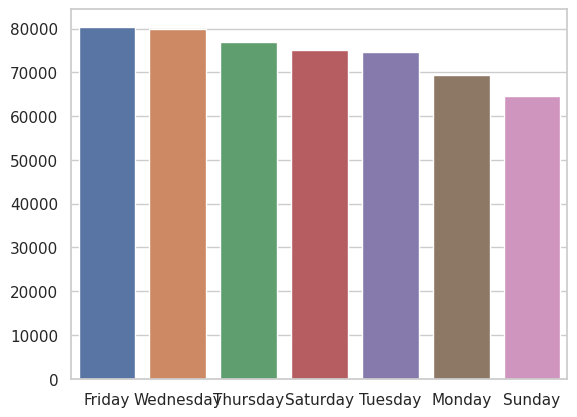

In [58]:
sns.barplot(x=capital_df['Day_of_week'].value_counts().index, y=capital_df['Day_of_week'].value_counts().values)

In [59]:
capital_df.reset_index(inplace=True)

In [60]:
count_quaterhour = pd.DataFrame(capital_df.groupby(['start_date','cluster_label','start_hour','quater_hour']).count()['rideable_type'])
count_quaterhour

rideable_type
start_date cluster_label start_hour quater_hour               
2022-01-01 0             0          1                        1
                                    2                        2
                         1          1                        1
                                    4                        3
                         2          1                        1
...                                                        ...
2022-12-31 7             22         3                        1
                                    4                        1
                         23         1                        1
                                    2                        4
                                    3                        1

[148885 rows x 1 columns]

In [61]:
sum_distance_minutes = pd.DataFrame(capital_df.groupby(['start_date','cluster_label','start_hour','quater_hour']).sum()[['Distance_travelled','minutes_travelled']])

In [62]:
sum_distance_minutes

Distance_travelled  \
start_date cluster_label start_hour quater_hour                       
2022-01-01 0             0          1                      2.915062   
                                    2                      0.673249   
                         1          1                      0.401791   
                                    4                      7.625466   
                         2          1                      3.158227   
...                                                             ...   
2022-12-31 7             22         3                      1.113387   
                                    4                      0.926748   
                         23         1                      0.848171   
                                    2                      5.508349   
                                    3                      2.056406   

                                                 minutes_travelled  
start_date cluster_label start_hour quater_hour                     
2022-01-01 0             0          1                           16  
                                    2                            8  
                         1          1                            4  
                                    4                           54  
                         2          1                           17  
...                                                            ...  
2022-12-31 7             22         3                            9  
                                    4                            6  
                         23         1                           26  
                                    2                           73  
                                    3                           11  

[148885 rows x 2 columns]

In [63]:
def seasons(number):
  if number in [3,4,5]: return 'Spring'
  elif number in [6,7,8]: return 'Summer'
  elif number in [9,10,11]: return 'Fall'
  else: return 'Winter'

capital_df['season'] = capital_df['start_month'].apply(seasons)

In [64]:
misc = capital_df[['start_date','Day_of_week','season']].drop_duplicates('start_date').set_index('start_date')

In [65]:
rental_dataframe = count_quaterhour.merge(sum_distance_minutes,left_index=True,right_index=True).reset_index().merge(misc, on='start_date')

In [66]:
rental_dataframe

,start_date,cluster_label,start_hour,quater_hour,rideable_type,Distance_travelled,minutes_travelled,Day_of_week,season
0,2022-01-01,0,0,1,1,2.915062,16,Saturday,Winter
1,2022-01-01,0,0,2,2,0.673249,8,Saturday,Winter
2,2022-01-01,0,1,1,1,0.401791,4,Saturday,Winter
3,2022-01-01,0,1,4,3,7.625466,54,Saturday,Winter
4,2022-01-01,0,2,1,1,3.158227,17,Saturday,Winter
...,...,...,...,...,...,...,...,...,...
148880,2022-12-31,7,22,3,1,1.113387,9,Saturday,Winter
148881,2022-12-31,7,22,4,1,0.926748,6,Saturday,Winter
148882,2022-12-31,7,23,1,1,0.848171,26,Saturday,Winter
148883,2022-12-31,7,23,2,4,5.508349,73,Saturday,Winter


In [67]:
rental_dataframe.isna().sum()

start_date            0
cluster_label         0
start_hour            0
quater_hour           0
rideable_type         0
Distance_travelled    0
minutes_travelled     0
Day_of_week           0
season                0
dtype: int64

In [68]:
station_data = pd.read_csv('/content/drive/MyDrive/Capstone Project/Capital_Bikeshare_Locations.csv')

In [69]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               724 non-null    float64
 1   Y                               724 non-null    float64
 2   NAME                            724 non-null    object 
 3   STATION_TYPE                    724 non-null    object 
 4   STATION_ID                      724 non-null    object 
 5   STATION_STATUS                  724 non-null    object 
 6   LAST_REPORTED                   724 non-null    object 
 7   NUM_DOCKS_AVAILABLE             724 non-null    int64  
 8   NUM_DOCKS_DISABLED              724 non-null    int64  
 9   NUM_BIKES_AVAILABLE             724 non-null    int64  
 10  NUM_EBIKES_AVAILABLE            724 non-null    int64  
 11  NUM_BIKES_DISABLED              724 non-null    int64  
 12  IS_INSTALLED                    724 

In [70]:
station_data = station_data[['NAME','NUM_DOCKS_AVAILABLE','NUM_DOCKS_DISABLED','NUM_EBIKES_AVAILABLE','LATITUDE','LONGITUDE','CAPACITY']]
station_data.head()

,NAME,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_EBIKES_AVAILABLE,LATITUDE,LONGITUDE,CAPACITY
0,20th & E St NW,12,1,0,38.896300,-77.045000,15
1,Temporary Rd & Old Reston Ave,15,0,0,38.960084,-77.353414,15
2,Capitol Heights Metro,12,0,0,38.888524,-76.913188,19
3,Fairfax Dr & Wilson Blvd,9,0,2,38.885801,-77.097745,12
4,Washington Blvd & 7th St N,9,0,2,38.880810,-77.090792,12


In [71]:
station_data['CAPACITY'].sum()

12487

In [72]:
cluster_station = capital_df[['start_station_name','cluster_label']].merge(station_data, left_on='start_station_name', right_on = 'NAME').groupby('start_station_name').mean().reset_index(drop=True) \
                                                         [['cluster_label','NUM_DOCKS_AVAILABLE','NUM_DOCKS_DISABLED','NUM_EBIKES_AVAILABLE','CAPACITY']]

# [['cluster_label','NUM_DOCKS_AVAILABLE','NUM_DOCKS_AVAILABLE','NUM_EBIKES_AVAILABLE','CAPACITY']]
cluster_station['cluster_label'] = cluster_station['cluster_label'].astype(int)
cluster_station = cluster_station.groupby('cluster_label').sum().reset_index()

In [73]:
weather_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Weather_hourly.csv')

In [74]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wdir              8758 non-null   float64
 1   temp              8760 non-null   float64
 2   maxt              8760 non-null   float64
 3   visibility        8760 non-null   float64
 4   wspd              8760 non-null   float64
 5   datetimeStr       8760 non-null   object 
 6   solarenergy       4903 non-null   float64
 7   heatindex         1049 non-null   float64
 8   cloudcover        8760 non-null   float64
 9   mint              8760 non-null   float64
 10  datetime          8760 non-null   int64  
 11  precip            8760 non-null   float64
 12  solarradiation    4903 non-null   float64
 13  weathertype       1106 non-null   object 
 14  snowdepth         47 non-null     float64
 15  sealevelpressure  8760 non-null   float64
 16  snow              0 non-null      float64


In [75]:
weather_df['datetime'] = weather_df['datetime'].apply(lambda x: datetime.fromtimestamp(x / 1000))

In [76]:
weather_df.drop(['datetimeStr','heatindex','snowdepth','snow','dew','wgust','windchill','info','solarenergy'], axis=1, inplace=True)
weather_df.drop(['precipcover'], axis=1, inplace=True)

In [77]:
mydict = {}

for i in weather_df['weathertype']:
  if pd.isna(i):
    continue
  item = i.split(",")
  for j in item:
    j = j.strip() # remove any leading/trailing whitespace
    if j in mydict:
      mydict[j] += 1
    else:
      mydict[j] = 1

mydict


{'Mist': 535,
 'Fog': 74,
 'Light Drizzle': 171,
 'Light Rain': 595,
 'Rain': 132,
 'Heavy Rain': 125,
 'Ice': 5,
 'Light Snow': 55,
 'Light Rain And Snow': 3,
 'Snow': 10,
 'Heavy Snow': 3,
 'Light Freezing Rain': 5,
 'Light Freezing Drizzle/Freezing Rain': 4,
 'Drizzle': 2,
 'Heavy Drizzle': 2,
 'Smoke Or Haze': 16,
 'Rain Showers': 1,
 'Thunderstorm': 51,
 'Lightning Without Thunder': 46,
 'Squalls': 1}

In [78]:
weather_df.isna().sum()

wdir                   2
temp                   0
maxt                   0
visibility             0
wspd                   0
cloudcover             0
mint                   0
datetime               0
precip                 0
solarradiation      3857
weathertype         7654
sealevelpressure       0
humidity               0
conditions             0
dtype: int64

In [79]:
weather_df.drop(['weathertype'], axis=1, inplace=True)

In [80]:
((weather_df['maxt'] == weather_df['temp']) & weather_df['temp'] == weather_df['mint']).sum()

0

In [81]:
weather_df.drop(['maxt','mint'],axis=1,inplace=True)

In [82]:
weather_df

,wdir,temp,visibility,wspd,cloudcover,datetime,precip,solarradiation,sealevelpressure,humidity,conditions
0,178.0,54.6,9.9,5.8,99.8,2022-01-01 00:00:00,0.00,NaN,1011.2,93.17,Overcast
1,188.0,55.1,4.4,5.9,100.0,2022-01-01 01:00:00,0.00,NaN,1010.9,90.31,Overcast
2,170.0,54.1,6.5,8.1,100.0,2022-01-01 02:00:00,0.00,5.0,1010.8,93.78,Overcast
3,186.0,56.0,6.5,5.9,100.0,2022-01-01 03:00:00,0.00,11.0,1010.8,90.60,Overcast
4,182.0,56.1,6.6,6.8,100.0,2022-01-01 04:00:00,0.00,NaN,1010.2,90.65,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
8755,211.0,56.1,4.0,5.9,100.0,2022-12-31 19:00:00,0.06,NaN,1011.4,96.77,"Rain, Overcast"
8756,187.0,55.2,1.6,8.1,100.0,2022-12-31 20:00:00,0.02,NaN,1010.7,95.94,"Rain, Overcast"
8757,222.0,56.1,5.3,5.2,100.0,2022-12-31 21:00:00,0.02,NaN,1011.2,96.93,"Rain, Overcast"
8758,291.0,54.9,5.3,3.9,95.2,2022-12-31 22:00:00,0.00,NaN,1010.4,96.73,Overcast


In [83]:
weather_df['solarradiation'].describe()

count    4903.000000
mean      160.193147
std       210.052719
min         0.000000
25%        21.000000
50%        69.000000
75%       203.500000
max      1043.000000
Name: solarradiation, dtype: float64

In [84]:
weather_df["solarradiation"] = weather_df["solarradiation"].interpolate(method='linear', limit_direction='forward', axis=0)


In [85]:
weather_df['solarradiation'] = weather_df['solarradiation'].fillna(5.0)

In [86]:
weather_df['hour'] = weather_df['datetime'].dt.hour

In [87]:
weather_df['datetime'] = weather_df['datetime'].dt.date
weather_df['datetime'] = weather_df['datetime'].astype('datetime64[ns]')

In [88]:
weather_df

,wdir,temp,visibility,wspd,cloudcover,datetime,precip,solarradiation,sealevelpressure,humidity,conditions,hour
0,178.0,54.6,9.9,5.8,99.8,2022-01-01,0.00,5.0,1011.2,93.17,Overcast,0
1,188.0,55.1,4.4,5.9,100.0,2022-01-01,0.00,5.0,1010.9,90.31,Overcast,1
2,170.0,54.1,6.5,8.1,100.0,2022-01-01,0.00,5.0,1010.8,93.78,Overcast,2
3,186.0,56.0,6.5,5.9,100.0,2022-01-01,0.00,11.0,1010.8,90.60,Overcast,3
4,182.0,56.1,6.6,6.8,100.0,2022-01-01,0.00,9.8,1010.2,90.65,Overcast,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,211.0,56.1,4.0,5.9,100.0,2022-12-31,0.06,0.0,1011.4,96.77,"Rain, Overcast",19
8756,187.0,55.2,1.6,8.1,100.0,2022-12-31,0.02,0.0,1010.7,95.94,"Rain, Overcast",20
8757,222.0,56.1,5.3,5.2,100.0,2022-12-31,0.02,0.0,1011.2,96.93,"Rain, Overcast",21
8758,291.0,54.9,5.3,3.9,95.2,2022-12-31,0.00,0.0,1010.4,96.73,Overcast,22


In [89]:
rental_dataframe['start_date']= rental_dataframe['start_date'].astype('datetime64[ns]')

In [90]:
rental_dataframe = rental_dataframe.merge(weather_df, left_on=['start_date','start_hour'],right_on=['datetime','hour']).drop(['datetime','hour'],axis=1)


In [91]:
rental_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148905 entries, 0 to 148904
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          148905 non-null  datetime64[ns]
 1   cluster_label       148905 non-null  int64         
 2   start_hour          148905 non-null  int64         
 3   quater_hour         148905 non-null  int64         
 4   rideable_type       148905 non-null  int64         
 5   Distance_travelled  148905 non-null  float64       
 6   minutes_travelled   148905 non-null  int64         
 7   Day_of_week         148905 non-null  object        
 8   season              148905 non-null  object        
 9   wdir                148883 non-null  float64       
 10  temp                148905 non-null  float64       
 11  visibility          148905 non-null  float64       
 12  wspd                148905 non-null  float64       
 13  cloudcover          148905 no

In [92]:
cluster_station

,cluster_label,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_EBIKES_AVAILABLE,CAPACITY
0,0,820.0,2.0,61.0,1265.0
1,1,1215.0,7.0,119.0,2734.0
2,2,1291.0,9.0,50.0,2187.0
3,3,728.0,2.0,29.0,1078.0
4,4,742.0,5.0,117.0,1743.0
5,5,629.0,0.0,58.0,998.0
6,6,469.0,6.0,71.0,947.0
7,7,613.0,4.0,85.0,1012.0


In [93]:
cluster_station.rename(columns= {'NUM_DOCKS_AVAILABLE':'num_docks_available','CAPACITY':'capacity','NUM_DOCKS_DISABLED':'num_docks_disabled','NUM_EBIKES_AVAILABLE':'num_ebikes_available'},inplace=True)

In [94]:
rental_dataframe = rental_dataframe.merge(cluster_station, on='cluster_label')

In [95]:
rental_dataframe.rename(columns = {'rideable_type':'count_of_bikes_quater'},inplace=True)

In [96]:
rental_dataframe['cluster_label'].value_counts()

7    29215
1    27739
2    27438
0    21116
5    17379
4    13905
3     8972
6     3141
Name: cluster_label, dtype: int64

In [97]:
rental_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148905 entries, 0 to 148904
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   start_date             148905 non-null  datetime64[ns]
 1   cluster_label          148905 non-null  int64         
 2   start_hour             148905 non-null  int64         
 3   quater_hour            148905 non-null  int64         
 4   count_of_bikes_quater  148905 non-null  int64         
 5   Distance_travelled     148905 non-null  float64       
 6   minutes_travelled      148905 non-null  int64         
 7   Day_of_week            148905 non-null  object        
 8   season                 148905 non-null  object        
 9   wdir                   148883 non-null  float64       
 10  temp                   148905 non-null  float64       
 11  visibility             148905 non-null  float64       
 12  wspd                   148905 non-null  floa

In [98]:
rental_dataframe

,start_date,cluster_label,start_hour,quater_hour,count_of_bikes_quater,Distance_travelled,minutes_travelled,Day_of_week,season,wdir,...,cloudcover,precip,solarradiation,sealevelpressure,humidity,conditions,num_docks_available,num_docks_disabled,num_ebikes_available,capacity
0,2022-01-01,0,0,1,1,2.915062,16,Saturday,Winter,178.0,...,99.8,0.0,5.000000,1011.2,93.17,Overcast,820.0,2.0,61.0,1265.0
1,2022-01-01,0,0,2,2,0.673249,8,Saturday,Winter,178.0,...,99.8,0.0,5.000000,1011.2,93.17,Overcast,820.0,2.0,61.0,1265.0
2,2022-01-01,0,1,1,1,0.401791,4,Saturday,Winter,188.0,...,100.0,0.0,5.000000,1010.9,90.31,Overcast,820.0,2.0,61.0,1265.0
3,2022-01-01,0,1,4,3,7.625466,54,Saturday,Winter,188.0,...,100.0,0.0,5.000000,1010.9,90.31,Overcast,820.0,2.0,61.0,1265.0
4,2022-01-01,0,2,1,1,3.158227,17,Saturday,Winter,170.0,...,100.0,0.0,5.000000,1010.8,93.78,Overcast,820.0,2.0,61.0,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148900,2022-12-30,6,10,1,1,0.419780,12,Friday,Winter,182.0,...,25.7,0.0,329.000000,1026.9,74.81,Partially cloudy,469.0,6.0,71.0,947.0
148901,2022-12-30,6,14,2,1,0.366841,6,Friday,Winter,161.0,...,25.7,0.0,343.000000,1023.0,45.93,Partially cloudy,469.0,6.0,71.0,947.0
148902,2022-12-30,6,21,3,1,0.875454,7,Friday,Winter,193.0,...,83.7,0.0,1.928571,1022.5,82.73,Overcast,469.0,6.0,71.0,947.0
148903,2022-12-31,6,7,4,1,0.878589,5,Saturday,Winter,194.0,...,100.0,0.0,8.357143,1018.6,95.90,Overcast,469.0,6.0,71.0,947.0


<Axes: xlabel='count_of_bikes_quater', ylabel='Count'>

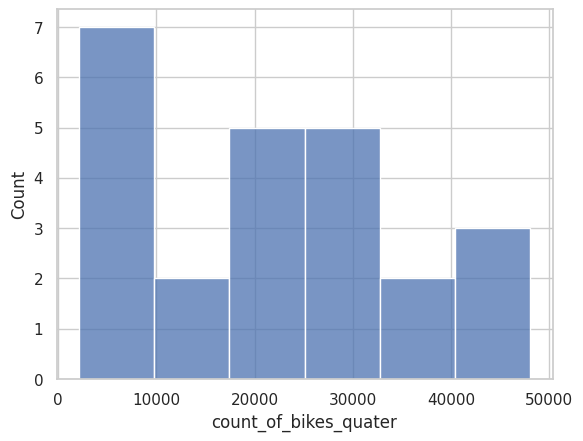

In [99]:
sns.histplot(rental_dataframe.groupby(['start_hour']).sum()['count_of_bikes_quater'])

<Axes: xlabel='count_of_bikes_quater', ylabel='Distance_travelled'>

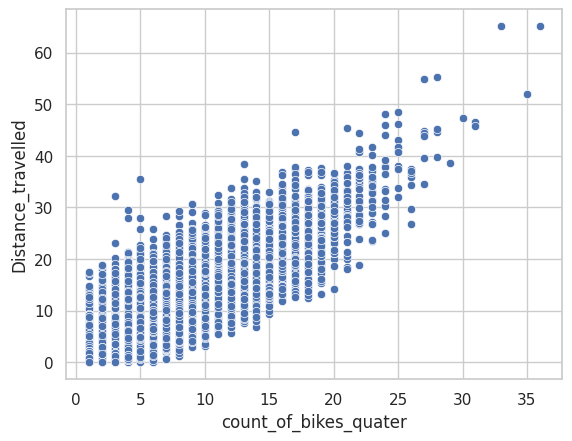

In [100]:
sns.scatterplot(data= rental_dataframe, x='count_of_bikes_quater',y='Distance_travelled')

<Axes: xlabel='count_of_bikes_quater', ylabel='minutes_travelled'>

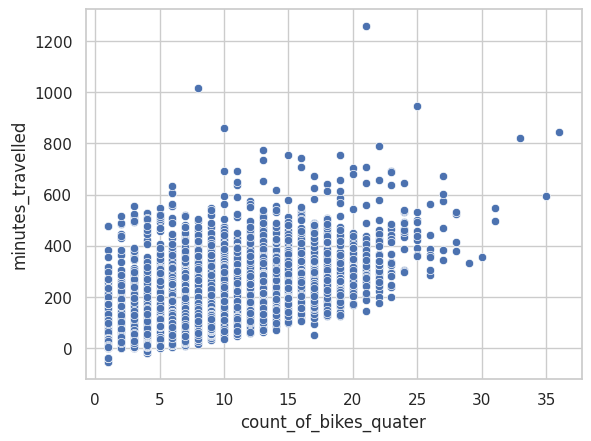

In [101]:

sns.scatterplot(data= rental_dataframe, x='count_of_bikes_quater',y='minutes_travelled')

<Axes: xlabel='start_date', ylabel='count_of_bikes_quater'>

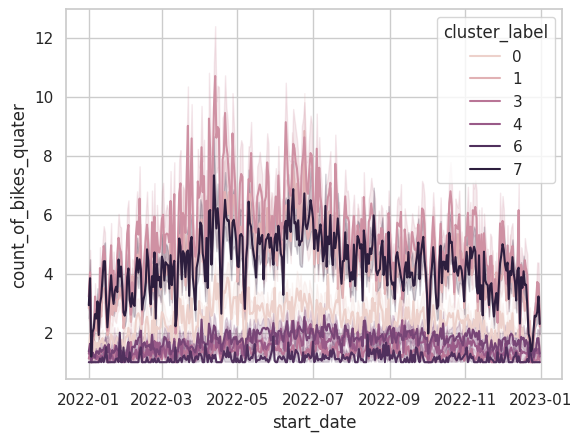

In [102]:
sns.lineplot(data=rental_dataframe, x='start_date',y='count_of_bikes_quater',hue='cluster_label' )

<Axes: xlabel='count_of_bikes_quater', ylabel='num_docks_available'>

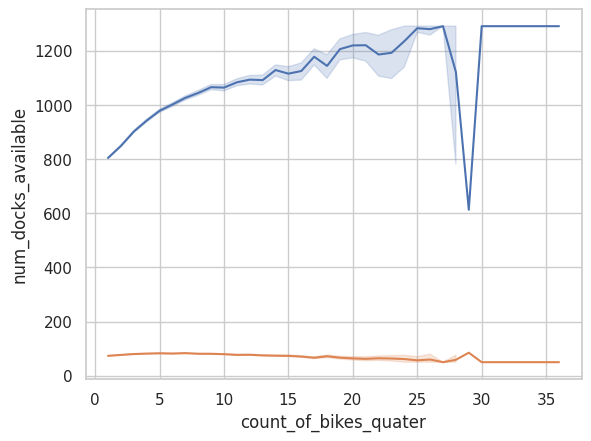

In [103]:
sns.lineplot(data= rental_dataframe,y='num_docks_available',x='count_of_bikes_quater')
sns.lineplot(data= rental_dataframe,y='num_ebikes_available',x='count_of_bikes_quater')

<Axes: xlabel='season'>

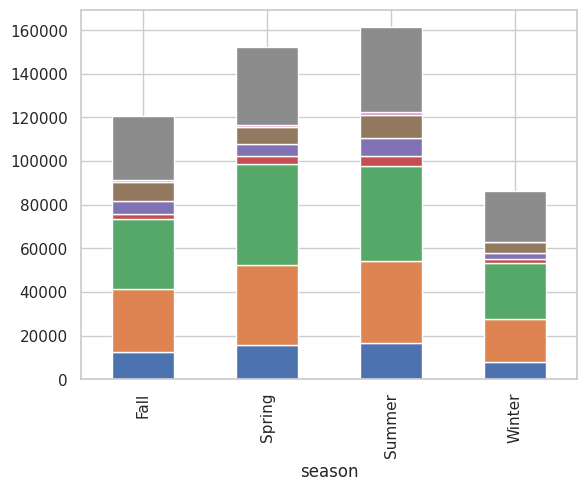

In [104]:
rental_dataframe.groupby(['season', 'cluster_label']).sum()['count_of_bikes_quater'].unstack().plot(kind='bar', stacked=True, legend=False)

<Axes: xlabel='capacity', ylabel='count_of_bikes_quater'>

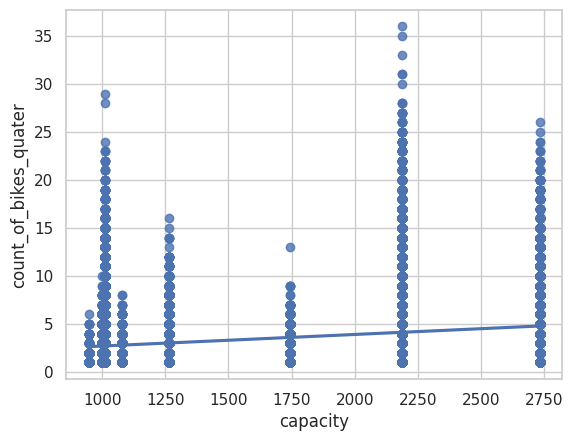

In [105]:

sns.regplot(x='capacity', y='count_of_bikes_quater', data=rental_dataframe)

<Axes: >

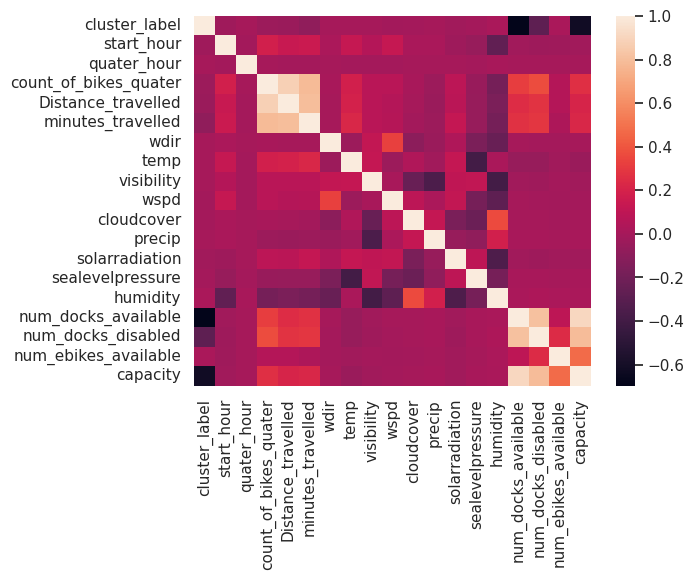

In [106]:
sns.heatmap(rental_dataframe.corr())

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Overcast'),
  Text(1, 0, 'Rain, Overcast'),
  Text(2, 0, 'Clear'),
  Text(3, 0, 'Partially cloudy'),
  Text(4, 0, 'Rain, Partially cloudy'),
  Text(5, 0, 'Rain')])

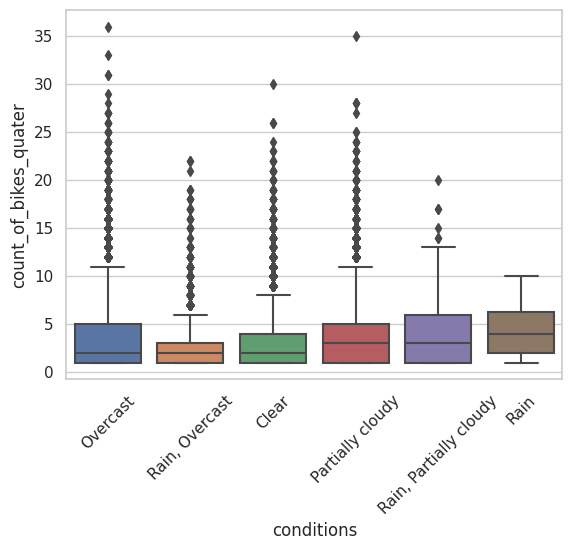

In [107]:
sns.boxplot(x="conditions", y="count_of_bikes_quater", data=rental_dataframe)
plt.xticks(rotation=45)

<Axes: xlabel='season', ylabel='count_of_bikes_quater'>

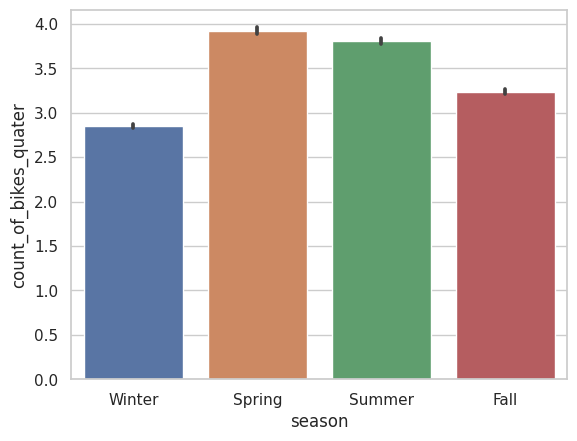

In [108]:
sns.barplot(data=rental_dataframe, x='season',y='count_of_bikes_quater')

<Axes: xlabel='season', ylabel='count'>

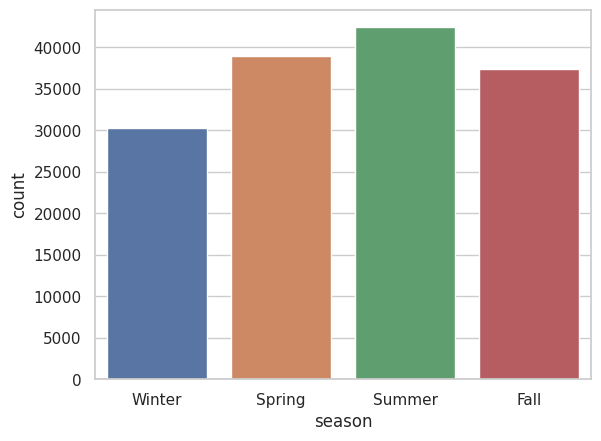

In [109]:
sns.countplot(data=rental_dataframe, x='season')

In [110]:
#plot histogram plots of weather data

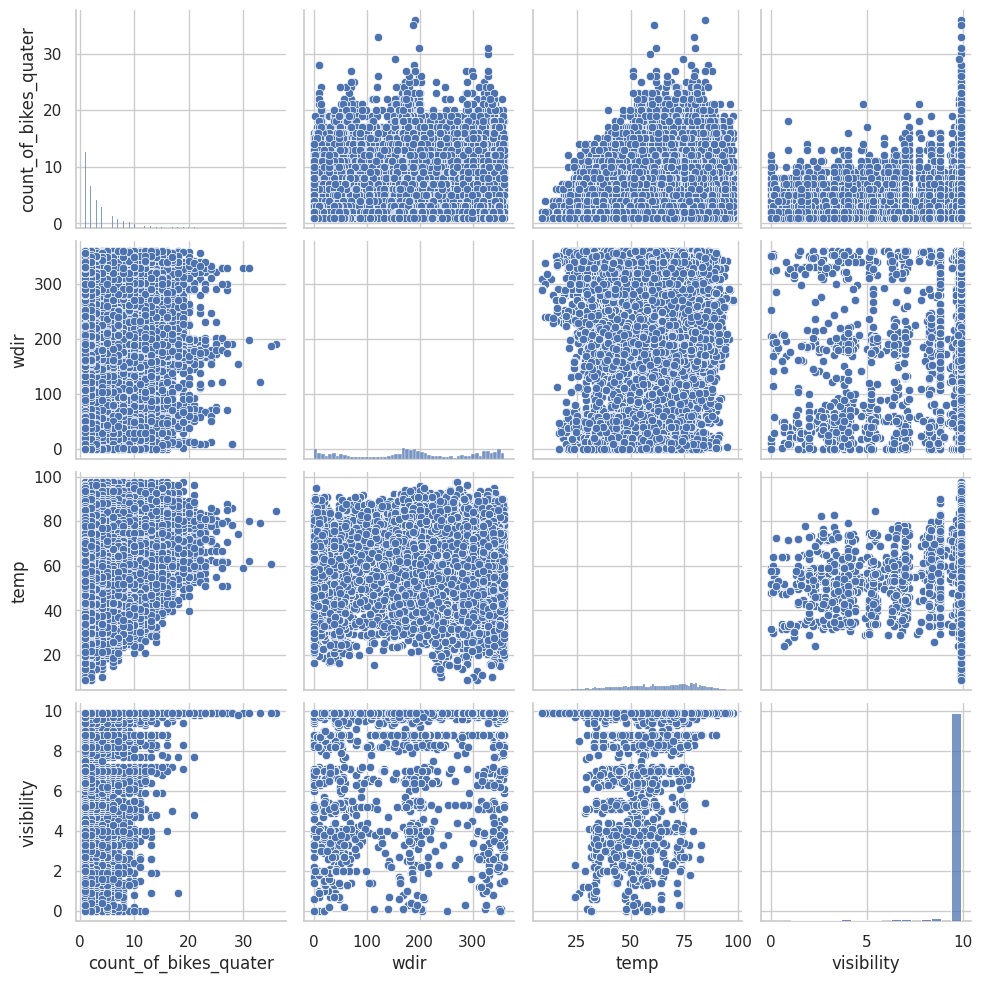

In [111]:
sns.pairplot(rental_dataframe[['count_of_bikes_quater','wdir','temp','visibility']])

<Axes: xlabel='capacity', ylabel='count'>

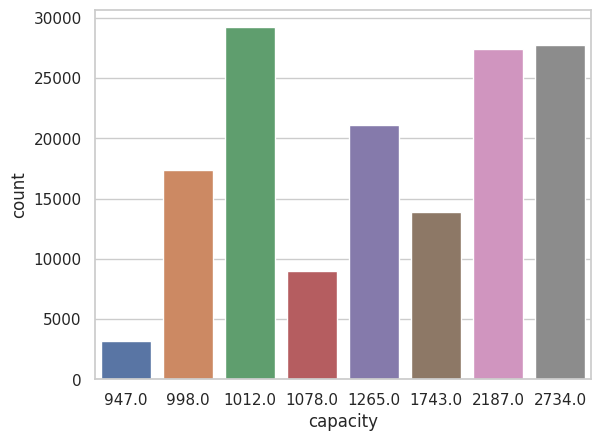

In [112]:
sns.countplot(data=rental_dataframe,x='capacity')

In [113]:
rental_dataframe['capacity']

0         1265.0
1         1265.0
2         1265.0
3         1265.0
4         1265.0
           ...  
148900     947.0
148901     947.0
148902     947.0
148903     947.0
148904     947.0
Name: capacity, Length: 148905, dtype: float64

<Axes: xlabel='wspd', ylabel='Count'>

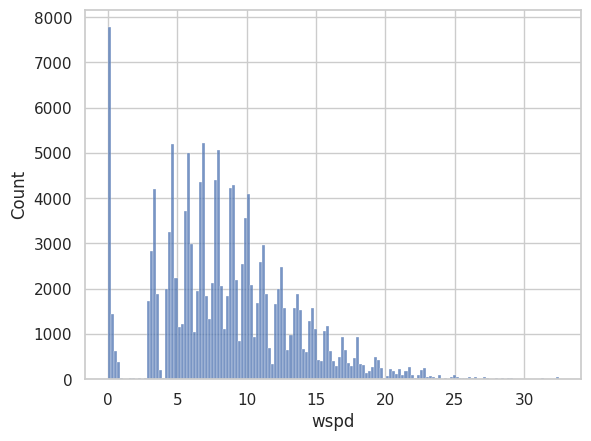

In [114]:
sns.histplot(rental_dataframe['wspd'])

<Axes: xlabel='start_hour', ylabel='quater_hour'>

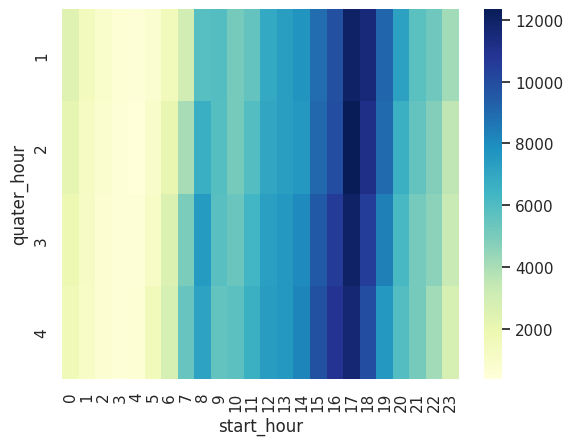

In [115]:
rentals_by_time = rental_dataframe.pivot_table(values='count_of_bikes_quater', index='quater_hour', columns='start_hour', aggfunc='sum')

# Create the heatmap using Seaborn
sns.heatmap(rentals_by_time, cmap='YlGnBu')

In [116]:
rental_dataframe['date'] = rental_dataframe['start_date'].dt.day
rental_dataframe['month'] = rental_dataframe['start_date'].dt.month
rental_dataframe['year'] = rental_dataframe['start_date'].dt.year

In [117]:
rental_dataframe

,start_date,cluster_label,start_hour,quater_hour,count_of_bikes_quater,Distance_travelled,minutes_travelled,Day_of_week,season,wdir,...,sealevelpressure,humidity,conditions,num_docks_available,num_docks_disabled,num_ebikes_available,capacity,date,month,year
0,2022-01-01,0,0,1,1,2.915062,16,Saturday,Winter,178.0,...,1011.2,93.17,Overcast,820.0,2.0,61.0,1265.0,1,1,2022
1,2022-01-01,0,0,2,2,0.673249,8,Saturday,Winter,178.0,...,1011.2,93.17,Overcast,820.0,2.0,61.0,1265.0,1,1,2022
2,2022-01-01,0,1,1,1,0.401791,4,Saturday,Winter,188.0,...,1010.9,90.31,Overcast,820.0,2.0,61.0,1265.0,1,1,2022
3,2022-01-01,0,1,4,3,7.625466,54,Saturday,Winter,188.0,...,1010.9,90.31,Overcast,820.0,2.0,61.0,1265.0,1,1,2022
4,2022-01-01,0,2,1,1,3.158227,17,Saturday,Winter,170.0,...,1010.8,93.78,Overcast,820.0,2.0,61.0,1265.0,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148900,2022-12-30,6,10,1,1,0.419780,12,Friday,Winter,182.0,...,1026.9,74.81,Partially cloudy,469.0,6.0,71.0,947.0,30,12,2022
148901,2022-12-30,6,14,2,1,0.366841,6,Friday,Winter,161.0,...,1023.0,45.93,Partially cloudy,469.0,6.0,71.0,947.0,30,12,2022
148902,2022-12-30,6,21,3,1,0.875454,7,Friday,Winter,193.0,...,1022.5,82.73,Overcast,469.0,6.0,71.0,947.0,30,12,2022
148903,2022-12-31,6,7,4,1,0.878589,5,Saturday,Winter,194.0,...,1018.6,95.90,Overcast,469.0,6.0,71.0,947.0,31,12,2022


In [118]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Select the categorical columns to be encoded
categorical_cols = ['Day_of_week', 'season','conditions']

# Perform one-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(rental_dataframe[categorical_cols]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_cols)

# Perform label encoding
label_encoder = LabelEncoder()
label_encoded = rental_dataframe[categorical_cols].apply(label_encoder.fit_transform)

# Concatenate the encoded columns back to the original DataFrame
data_encoded = pd.concat([rental_dataframe, one_hot_encoded, label_encoded], axis=1)

# Drop the original categorical columns if needed
data_encoded.drop(categorical_cols, axis=1, inplace=True)


In [119]:
data_encoded

,start_date,cluster_label,start_hour,quater_hour,count_of_bikes_quater,Distance_travelled,minutes_travelled,wdir,temp,visibility,...,season_Fall,season_Spring,season_Summer,season_Winter,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,2022-01-01,0,0,1,1,2.915062,16,178.0,54.6,9.9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2022-01-01,0,0,2,2,0.673249,8,178.0,54.6,9.9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2022-01-01,0,1,1,1,0.401791,4,188.0,55.1,4.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2022-01-01,0,1,4,3,7.625466,54,188.0,55.1,4.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2022-01-01,0,2,1,1,3.158227,17,170.0,54.1,6.5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148900,2022-12-30,6,10,1,1,0.419780,12,182.0,43.4,9.9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
148901,2022-12-30,6,14,2,1,0.366841,6,161.0,62.2,9.9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
148902,2022-12-30,6,21,3,1,0.875454,7,193.0,50.1,9.9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
148903,2022-12-31,6,7,4,1,0.878589,5,194.0,51.0,0.3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [120]:
rental_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148905 entries, 0 to 148904
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   start_date             148905 non-null  datetime64[ns]
 1   cluster_label          148905 non-null  int64         
 2   start_hour             148905 non-null  int64         
 3   quater_hour            148905 non-null  int64         
 4   count_of_bikes_quater  148905 non-null  int64         
 5   Distance_travelled     148905 non-null  float64       
 6   minutes_travelled      148905 non-null  int64         
 7   Day_of_week            148905 non-null  object        
 8   season                 148905 non-null  object        
 9   wdir                   148883 non-null  float64       
 10  temp                   148905 non-null  float64       
 11  visibility             148905 non-null  float64       
 12  wspd                   148905 non-null  floa

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select the numeric columns to be normalized
numeric_cols = ['Distance_travelled', 'minutes_travelled','wdir','temp', 'visibility', 'wspd','cloudcover','precip','solarradiation','sealevelpressure','humidity','num_docks_available','num_docks_disabled','num_ebikes_available','capacity','temp', 'visibility', 'wspd']

# Perform scaling to a specific range
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_range = scaler.fit_transform(data_encoded[numeric_cols])
normalized_range = pd.DataFrame(normalized_range, columns=numeric_cols)

# Concatenate the normalized columns back to the original DataFrame
data_normalized = pd.concat([data_encoded.drop(numeric_cols,axis=1), normalized_range], axis=1)

# Drop the original numeric columns if needed

# Print the updated DataFrame
print(data_normalized.head())


  start_date  cluster_label  start_hour  quater_hour  count_of_bikes_quater  \
0 2022-01-01              0           0            1                      1   
1 2022-01-01              0           0            2                      2   
2 2022-01-01              0           1            1                      1   
3 2022-01-01              0           1            4                      3   
4 2022-01-01              0           2            1                      1   

   date  month  year  Day_of_week_Friday  Day_of_week_Monday  ...  \
0     1      1  2022                 0.0                 0.0  ...   
1     1      1  2022                 0.0                 0.0  ...   
2     1      1  2022                 0.0                 0.0  ...   
3     1      1  2022                 0.0                 0.0  ...   
4     1      1  2022                 0.0                 0.0  ...   

   solarradiation  sealevelpressure  humidity  num_docks_available  \
0        0.004794          0.468284  0.9

In [122]:
data_normalized.head()

,start_date,cluster_label,start_hour,quater_hour,count_of_bikes_quater,date,month,year,Day_of_week_Friday,Day_of_week_Monday,...,solarradiation,sealevelpressure,humidity,num_docks_available,num_docks_disabled,num_ebikes_available,capacity,temp,visibility,wspd
0,2022-01-01,0,0,1,1,1,1,2022,0.0,0.0,...,0.004794,0.468284,0.917681,0.427007,0.222222,0.355556,0.177952,0.515220,1.000000,0.178462
1,2022-01-01,0,0,2,2,1,1,2022,0.0,0.0,...,0.004794,0.468284,0.917681,0.427007,0.222222,0.355556,0.177952,0.515220,1.000000,0.178462
2,2022-01-01,0,1,1,1,1,1,2022,0.0,0.0,...,0.004794,0.462687,0.883211,0.427007,0.222222,0.355556,0.177952,0.520857,0.444444,0.181538
3,2022-01-01,0,1,4,3,1,1,2022,0.0,0.0,...,0.004794,0.462687,0.883211,0.427007,0.222222,0.355556,0.177952,0.520857,0.444444,0.181538
4,2022-01-01,0,2,1,1,1,1,2022,0.0,0.0,...,0.004794,0.460821,0.925033,0.427007,0.222222,0.355556,0.177952,0.509583,0.656566,0.249231


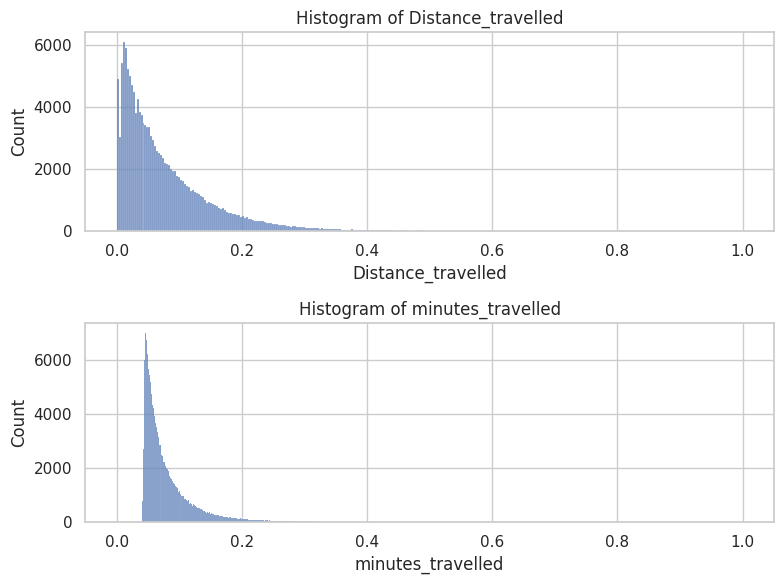

In [123]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for 'Distance_travelled'
sns.histplot(data_normalized['Distance_travelled'], ax=axs[0])
axs[0].set_title('Histogram of Distance_travelled')

# Plot histogram for 'minutes_travelled'
sns.histplot(data_normalized['minutes_travelled'], ax=axs[1])
axs[1].set_title('Histogram of minutes_travelled')

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [124]:
data_normalized.drop('start_date',axis=1,inplace=True)

In [125]:
from sklearn.utils import shuffle

# Shuffle the data
shuffled_data = shuffle(data_normalized).reset_index(drop=True)

print(shuffled_data.shape)
# Print the shuffled data
shuffled_data.head()


(148905, 42)


,cluster_label,start_hour,quater_hour,count_of_bikes_quater,date,month,year,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,...,solarradiation,sealevelpressure,humidity,num_docks_available,num_docks_disabled,num_ebikes_available,capacity,temp,visibility,wspd
0,0,16,3,4,17,4,2022,0.0,0.0,0.0,...,0.172579,0.688433,0.159335,0.427007,0.222222,0.355556,0.177952,0.531003,1.0,0.412308
1,0,13,2,5,9,4,2022,0.0,0.0,1.0,...,0.385427,0.375000,0.336266,0.427007,0.222222,0.355556,0.177952,0.529876,1.0,0.486154
2,7,11,1,4,17,10,2022,0.0,1.0,0.0,...,0.379674,0.376866,0.700494,0.175182,0.444444,0.622222,0.036374,0.631342,1.0,0.347692
3,5,0,2,3,17,12,2022,0.0,0.0,1.0,...,0.002581,0.423507,0.573581,0.194647,0.000000,0.322222,0.028539,0.370913,1.0,0.175385
4,4,11,1,2,14,6,2022,0.0,0.0,0.0,...,0.050815,0.494403,0.598891,0.332117,0.555556,0.977778,0.445439,0.780158,1.0,0.341538


In [140]:
shuffled_data.dropna(inplace=True)

In [141]:
X = shuffled_data.drop('count_of_bikes_quater',axis=1)
y = shuffled_data['count_of_bikes_quater']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
# adj_r2_list=[]

In [144]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [145]:
# making a function to train and evaluate linear model
def train_model(model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  # adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  # print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  # adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [146]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    # adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    # print("Adjusted R2 : ",adj_r2)

    # train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    # adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [147]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [148]:
from sklearn.linear_model import LinearRegression


================Evalution Matrix=========================

MSE : 390.15189258696114
RMSE : 19.75226297382052
R2 : 0.7909508315389
Adjusted R2 :  0.7906625848294027

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



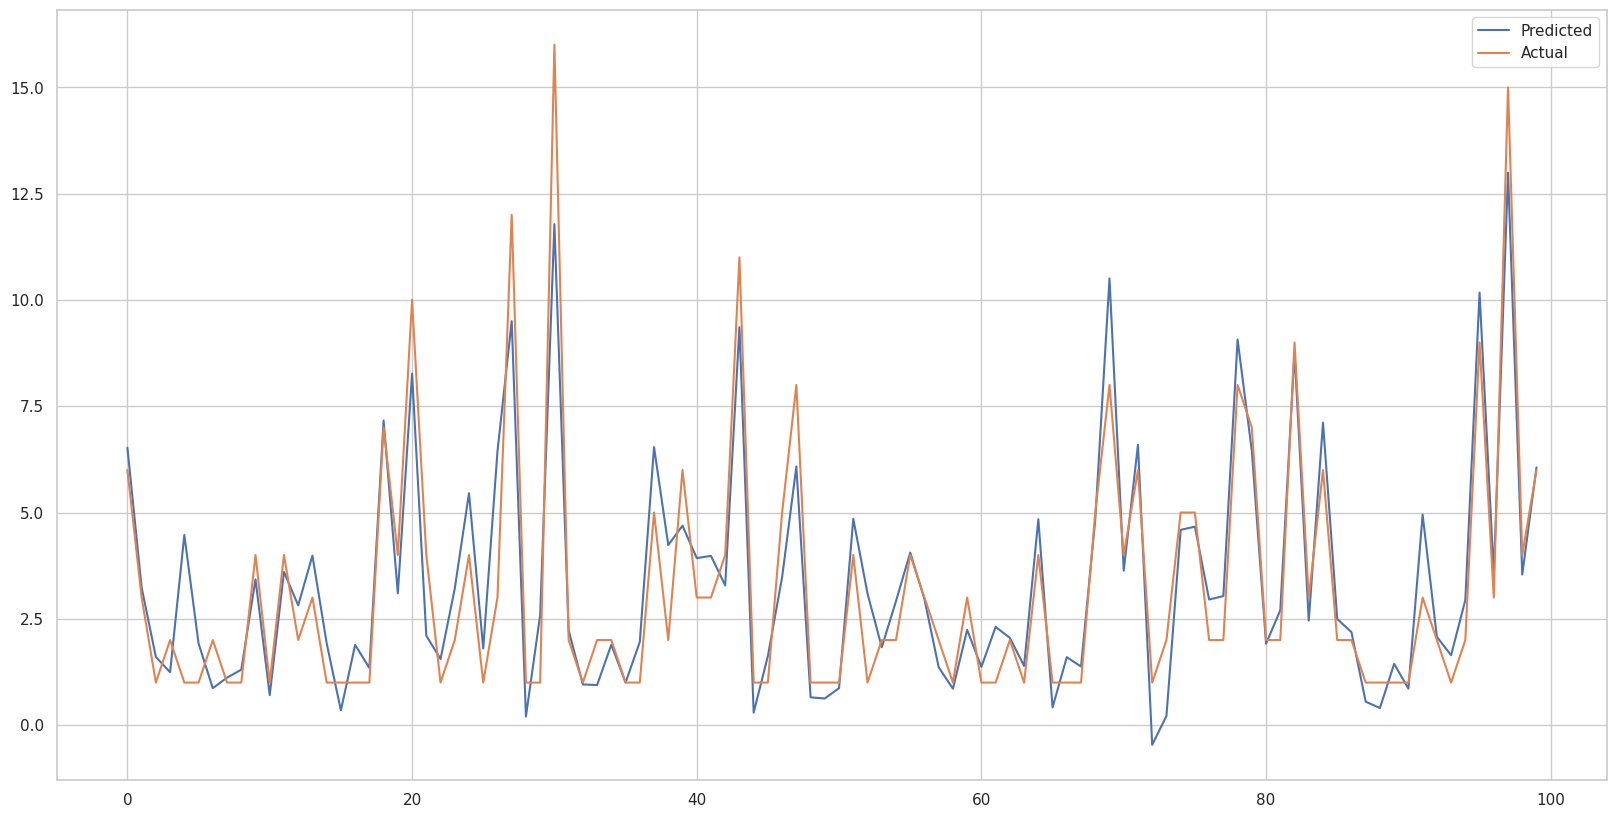

In [149]:
linear_model= LinearRegression()
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


================Evalution Matrix=========================

MSE : 4.373394827476837
RMSE : 2.0912663215087735
R2 : 0.5443085923553383

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



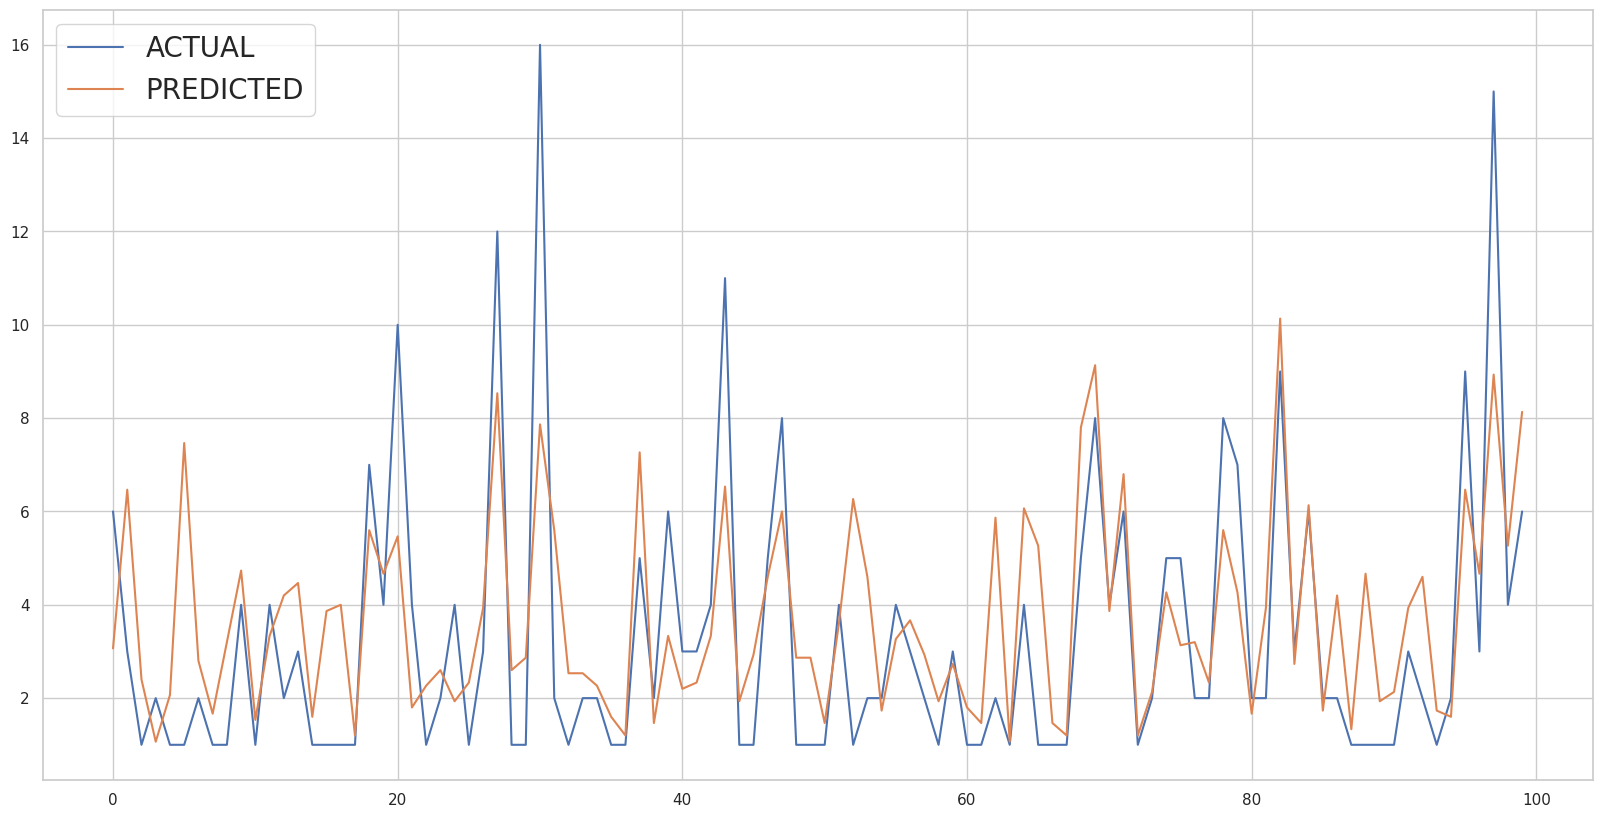

In [151]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train,y_train,X_test,y_test)

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rf_model = RandomForestRegressor()


In [155]:
# creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [156]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

In [ ]:
run_model(rf_grid,X_train,y_train,X_test,y_test)


In [ ]:
optimal_rf_model=rf_grid.best_estimator_

In [ ]:
get_features_importance(optimal_rf_model,X_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model=GradientBoostingRegressor()

In [ ]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [ ]:
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
optimal_gb_model=gb_grid.best_estimator_

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)